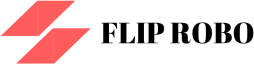

**Name: Vikas Kumar Mishra**

**Batch: Internship-32**

**Id:44**

# PROJECT: FAKE NEWS

## Context

**Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.**

## Content

**What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.**

## What is a Fake News?

**Fake news simply means incorporating information that leads people to the wrong path. Nowadays fake news spreads like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas.**

**For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.**

## Workflow

**In this project, we are using some machine learning and Natural language processing libraries like NLTK, re (Regular Expression), Scikit Learn**

## Natural Language Processing

**Machine learning data only works with numerical features so we have to convert text data into numerical columns. So we have to pre-process the text, called natural language processing**

**In-text pre-processing, we clean our text by steaming, lemmatization, removing stopwords, removing special symbols and numbers, etc. After cleaning the data, we have to feed this text data into a vectorizer which will convert this text data into numerical features.**

## Dataset

**I can find many datasets for fake news detection on Kaggle or many other sites. I download these datasets from Kaggle. There are two datasets one for fake news and one for true news. In true news, there is 21417 news, and in fake news, there is 23481 news. You have to insert one label column zero for fake news and one for true news. We combined both datasets using pandas’ built-in function.**

# Machine Learning Model Building

### Importing All the necessary libraries.

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import sklearn 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

### Fake News And True News Data

In [2]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [3]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
fake.shape

(23481, 4)

In [6]:
true.shape

(21417, 4)

## Data Cleaning And Preparation

In [7]:
# Add flag to track fake and real news

fake['label']='fake'
true['label']='true'

In [8]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [9]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


#### Concatenate Data Frames 

**With the help of concat method we merge the two csv files data in a single file data.**

In [10]:
data = pd.concat([fake, true]).reset_index(drop=True)
data.shape

(44898, 5)

In [11]:
data.head(5)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [12]:
data.tail(5)

,title,text,subject,date,label
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


### Shuffle The Data

##### shuffling techniques aim to mix up data and can optionally retain logical relationships between columns. It randomly shuffles data from a dataset within an attribute or a set of attributes.

In [13]:
from sklearn.utils import shuffle

In [14]:
data = shuffle(data)
data = data.reset_index(drop = True) 

In [15]:
# Chek The Data

data.head()

,title,text,subject,date,label
0,Trump Hotels Asked For People’s Favorite Trav...,It s always interesting when people decide to ...,News,"January 30, 2017",fake
1,Historian BURIES Every Excuse Senate Republic...,Senate Republicans were just taken to the wood...,News,"March 31, 2016",fake
2,Trump legal team delays filing leak complaint ...,(Reuters) - Lawyers for U.S. President Donald ...,politicsNews,"June 13, 2017",true
3,HYSTERICAL! The Guy Who’s Spent Majority Of Bo...,Of course Obama the putz blames too little gov...,Government News,"May 5, 2016",fake
4,John Boehner Tries To Post On Facebook Like A...,Former Speaker of the House John Boehner took ...,News,"April 3, 2016",fake


### Removing Unusual Columns

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


#### Removing The 'date' Column

In [17]:
data.drop(["date"], axis=1, inplace=True)
data.head()

,title,text,subject,label
0,Trump Hotels Asked For People’s Favorite Trav...,It s always interesting when people decide to ...,News,fake
1,Historian BURIES Every Excuse Senate Republic...,Senate Republicans were just taken to the wood...,News,fake
2,Trump legal team delays filing leak complaint ...,(Reuters) - Lawyers for U.S. President Donald ...,politicsNews,true
3,HYSTERICAL! The Guy Who’s Spent Majority Of Bo...,Of course Obama the putz blames too little gov...,Government News,fake
4,John Boehner Tries To Post On Facebook Like A...,Former Speaker of the House John Boehner took ...,News,fake


#### Removing The 'title' Column

In [18]:
data.drop(["title"], axis=1, inplace=True)
data.head()

,text,subject,label
0,It s always interesting when people decide to ...,News,fake
1,Senate Republicans were just taken to the wood...,News,fake
2,(Reuters) - Lawyers for U.S. President Donald ...,politicsNews,true
3,Of course Obama the putz blames too little gov...,Government News,fake
4,Former Speaker of the House John Boehner took ...,News,fake


### Convert To Lower Case

##### Lowercase letters are used for common nouns and for every letter after the initial letter of the first word of a sentence, so we convert text into lower case. 

In [19]:
data['text'] = data['text'].apply(lambda x : x.lower())
data.head()

,text,subject,label
0,it s always interesting when people decide to ...,News,fake
1,senate republicans were just taken to the wood...,News,fake
2,(reuters) - lawyers for u.s. president donald ...,politicsNews,true
3,of course obama the putz blames too little gov...,Government News,fake
4,former speaker of the house john boehner took ...,News,fake


### Removing Punctuations

##### Punctuations are special symbols that add grammatical structure to natural English. Natural English strings are not easily processed; hence we need to remove punctuation from strings before we can use them for further processing.

In [20]:
import string

In [21]:
def punch_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['text'] = data['text'].apply(punch_removal)

In [22]:
# Chek data

data.head()

,text,subject,label
0,it s always interesting when people decide to ...,News,fake
1,senate republicans were just taken to the wood...,News,fake
2,reuters lawyers for us president donald trump...,politicsNews,true
3,of course obama the putz blames too little gov...,Government News,fake
4,former speaker of the house john boehner took ...,News,fake


## Importing NLTK Libraries

**The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for
applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing,
classification, stemming, tagging and semantic reasoning.**

In [23]:
import nltk
from nltk.corpus import stopwords


### Removing Stop Words

**Stop words are available in abundance in any human language. By removing these words, we remove the low-level information from our text in order to give more focus to the important information.**

In [24]:
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

In [25]:
data.head()

,text,subject,label
0,always interesting people decide use social me...,News,fake
1,senate republicans taken woodshed historian un...,News,fake
2,reuters lawyers us president donald trump like...,politicsNews,true
3,course obama putz blames little government poi...,Government News,fake
4,former speaker house john boehner took faceboo...,News,fake


# Data Visualization

#### News Articles Per Subject

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


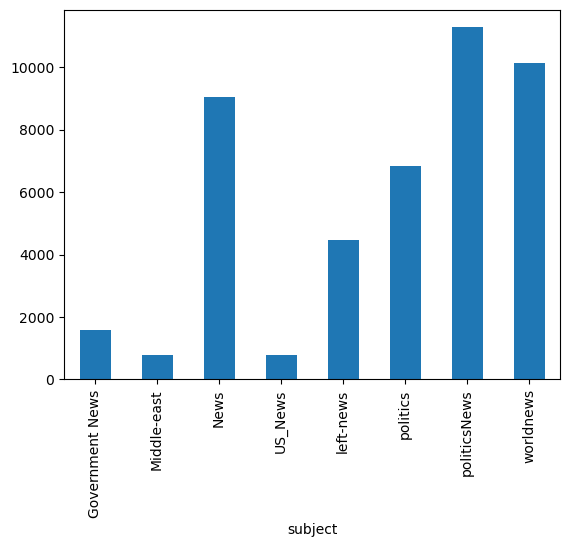

In [88]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

**In News Articles we can see the bar plot, politics news are higher than other news.**

#### Fake And Real News Articles

label
fake    23481
true    21417
Name: text, dtype: int64


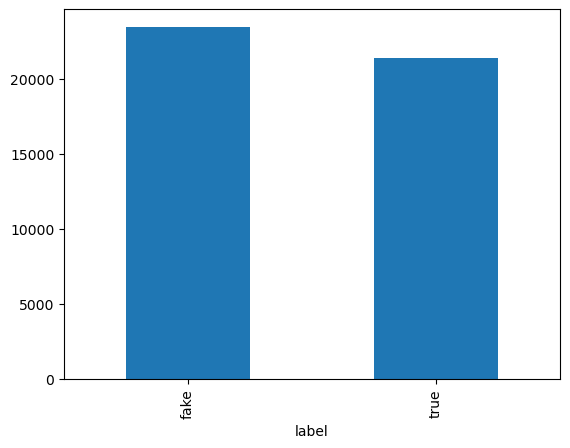

In [27]:
print(data.groupby(['label'])['text'].count())
data.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

**We can see in the bar plot, the fake news is some high, but our data is balanced**  

## Install Word Cloud For Frequency of Images and Word

!pip install wordcloud

#### Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud

### Word Cloud Images For Fake News

In [28]:
from wordcloud import WordCloud

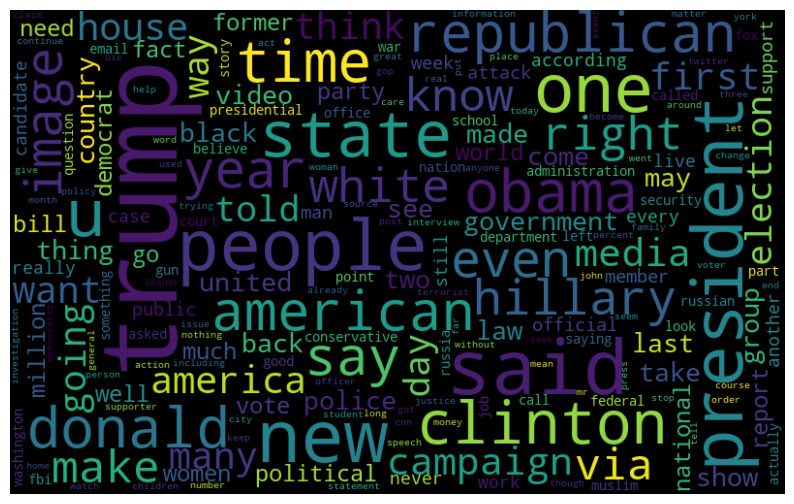

In [29]:
fake_data = data[data["label"]=="fake"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud Images For True News

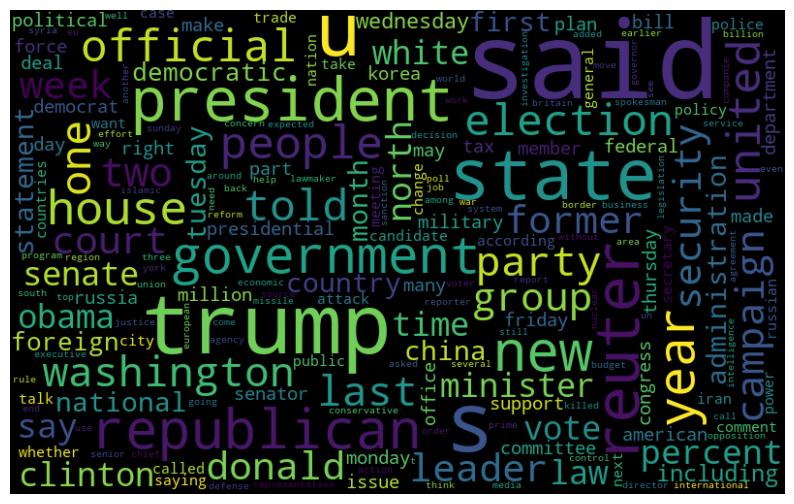

In [30]:
true_data = data[data["label"]=="true"]
all_words = ' '.join([text for text in true_data.text])
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Most Frequent Words Counter

#### Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words).

In [31]:
from nltk import tokenize

In [32]:
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    
    frequency = nltk.FreqDist(token_phrase)
    
    df_frequency = pd.DataFrame({"word":list(frequency.keys()), "Frequency":list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data = df_frequency, x = "word", y = "Frequency", color='blue')
    ax.set(ylabel = "count")
    plt.xticks(rotation='vertical')
    plt.show()

### Most Frequent Words In Fake News

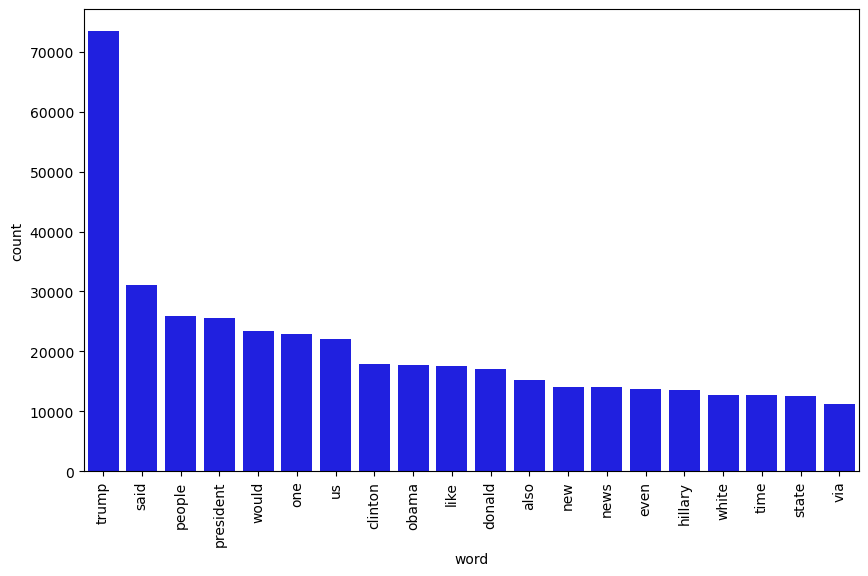

In [33]:
counter(data[data["label"]=="fake"], "text", 20)

#### We can see in fake news the most frequent word is 'trump', this word repeat mostly time in fake news

### Most Frequent Words In Real News

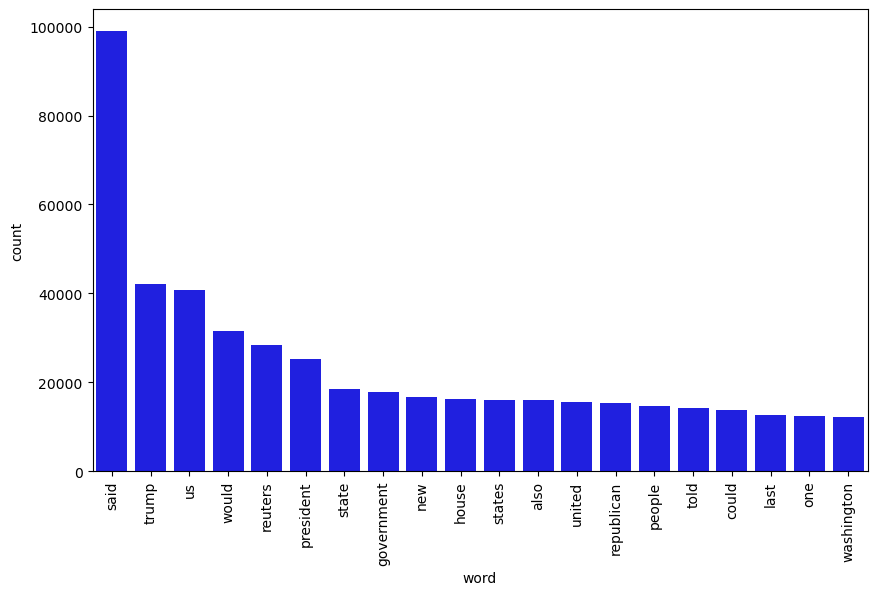

In [34]:
counter(data[data["label"]=="true"], "text", 20)

#### We can see in true news the most frequent word is 'said', this word repeat mostly time in true news.

# Model Building

### Seperate The Data

In [35]:
x = data['text']
x.head()

0    always interesting people decide use social me...
1    senate republicans taken woodshed historian un...
2    reuters lawyers us president donald trump like...
3    course obama putz blames little government poi...
4    former speaker house john boehner took faceboo...
Name: text, dtype: object

In [36]:
y = data.label
y.head(10)

0    fake
1    fake
2    true
3    fake
4    fake
5    fake
6    fake
7    true
8    true
9    true
Name: label, dtype: object

In [37]:
x.shape

(44898,)

In [38]:
y.shape

(44898,)

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
x_train.head()

36335    grand rapids michkent ohio reuters republican ...
12384    moscow reuters president vladimir putin said w...
24419    washington reuters top us house representative...
24740    jakarta reuters indonesia military chief tempo...
27039    21st century wire says devastating news befell...
Name: text, dtype: object

In [100]:
x_train.shape

(35918,)

In [101]:
x_test.head()

22216    21st century wire says one curious thing presi...
27917    seoul reuters south korea imposed unilateral s...
25007    president barack obama recently said told russ...
1377     washington reuters president barack obama said...
32476    civil political discourse took beating west vi...
Name: text, dtype: object

In [102]:
x_test.shape

(8980,)

In [103]:
y_train.head()

36335    true
12384    true
24419    true
24740    true
27039    fake
Name: label, dtype: object

In [104]:
y_train.shape

(35918,)

In [105]:
y_test.head()

22216    fake
27917    true
25007    fake
1377     true
32476    fake
Name: label, dtype: object

In [106]:
y_test.shape

(8980,)

# 1. DecisionTree Classifier

### Vectorizing and Applying TF-IDF(DecisionTree Classifier)

In [107]:
pipe_dt = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier())])

### Fitting The Model(DecisionTree Classifier)

In [108]:
model_dt = pipe_dt.fit(x_train, y_train)

### Accuracy Score(DecisionTree Classifier)

In [109]:
prediction_dt = model_dt.predict(x_test)
print('\33[1m' + "Decision Tree accuracy_score : {}%".format(round(accuracy_score(y_test, prediction_dt)*100, 2)))

Decision Tree accuracy_score : 99.78%


### Classification Report(DecisionTree Classifier)

In [110]:
print('\33[1m'+"Decision Tree Classification Report :\n\n")
print(classification_report(y_test, prediction_dt))

Decision Tree Classification Report :


              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      4666
        true       1.00      1.00      1.00      4314

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



### Confusion Matrix(DecisionTree Classifier)

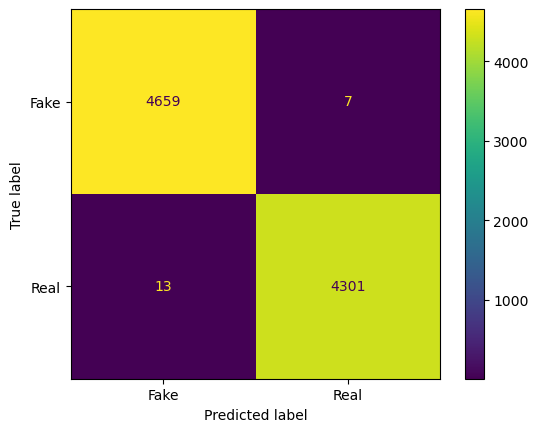

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction_dt)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Fake','Real'])
cmd.plot()

### Cross Validation Score(DecisionTree Classifier)

In [53]:
from sklearn.model_selection import cross_val_score

score_dt = cross_val_score(model_dt, x, y, cv=5)
print('Score :', score_dt)
print('\033[1m'+'Cross Validation Score :', model_dt, ":"+'\033[0m\n')
print("Mean CV Score :", score_dt.mean())
print("Standard Deviation :",score_dt.std())
print('Difference in accuracy_score & CV Score:', (accuracy_score(y_test, prediction_dt)*100)-(score_dt.mean()*100))

Score : [0.99476615 0.99643653 0.99788419 0.99599064 0.99688161]
Cross Validation Score : Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=20,
                                        random_state=42))]) :

Mean CV Score : 0.9963918234355787
Standard Deviation : 0.0010269186119036505
Difference in accuracy_score & CV Score: 0.12696464976060895


# 2. KNeighbors Classifier

### Vectorizing and Applying TF-IDF(KNeighbors Classifier)

In [54]:
pipe_kn = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier())])

### Fitting The Model(KNeighbors Classifier)

In [55]:
model_kn = pipe_kn.fit(x_train, y_train)

### Accuracy Score(KNeighbors Classifier)

In [56]:
prediction_kn = model_kn.predict(x_test)
print('\33[1m' + 'KNeighbors accuracy_score : {}%'.format(round(accuracy_score(y_test, prediction_kn)*100, 2)))

KNeighbors accuracy_score : 63.26%


### Classification Report(KNeighbors Classifier)

In [57]:
print('\33[1m'+"KNeighbors Classification Report :\n\n")
print(classification_report(y_test, prediction_kn))

KNeighbors Classification Report :


              precision    recall  f1-score   support

        fake       0.59      0.99      0.74      4666
        true       0.96      0.25      0.39      4314

    accuracy                           0.63      8980
   macro avg       0.77      0.62      0.56      8980
weighted avg       0.77      0.63      0.57      8980



### Confusion Matrix(KNeighbors Classifier)

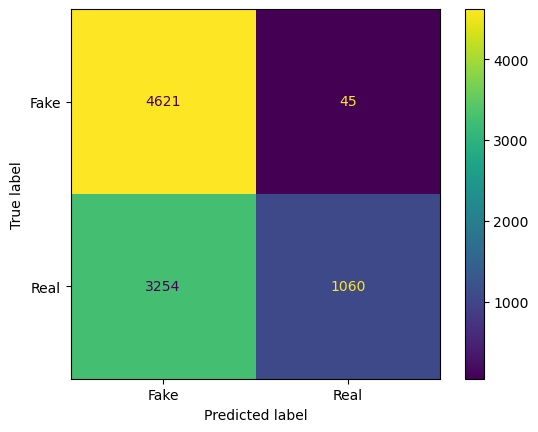

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction_kn)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Fake','Real'])
cmd.plot()

### Cross Validation Score(KNeighbors Classifier)

In [59]:
score_kn = cross_val_score(model_kn, x, y, cv=5)
print('Score :', score_kn)
print('\033[1m'+'Cross Validation Score :', model_kn, ":"+'\033[0m\n')
print("Mean CV Score :", score_kn.mean())
print("Standard Deviation :",score_kn.std())
print('Difference in accuracy_score & CV Score:', (accuracy_score(y_test, prediction_kn)*100)-(score_kn.mean()*100))

Score : [0.6311804  0.63095768 0.63363029 0.63292126 0.63381223]
Cross Validation Score : Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', KNeighborsClassifier())]) :

Mean CV Score : 0.6325003726835022
Standard Deviation : 0.0012080595431652257
Difference in accuracy_score & CV Score: 0.012768967729954284


# 3. Logistic Regression

### Vectorizing and Applying TF-IDF(Logistic Regression)

In [60]:
pipe_lr = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

### Fitting The Model(Logistic Regression)

In [61]:
model_lr = pipe_lr.fit(x_train, y_train)

### Accuracy Score(Logistic Regression)

In [62]:
prediction_lr = model_lr.predict(x_test)
print('\33[1m' + 'Logistic Regression accuracy_score : {}%'.format(round(accuracy_score(y_test, prediction_lr)*100, 2)))

Logistic Regression accuracy_score : 98.91%


### Classification Report(Logistic Regression)

In [64]:
print('\33[1m'+"Logistic Regression Classification Report :\n\n")
print(classification_report(y_test, prediction_lr))

Logistic Regression Classification Report :


              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4666
        true       0.99      0.99      0.99      4314

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



### Confusion Matrix(Logistic Regression)

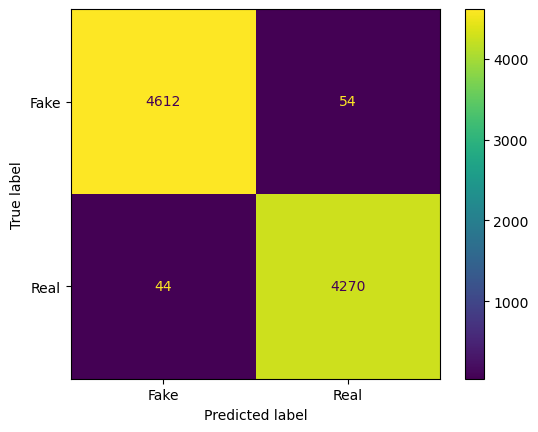

In [65]:
cm = confusion_matrix(y_test, prediction_lr)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Fake','Real'])
cmd.plot()

### Cross Validation Score(Logistic Regression)

In [66]:
score_lr = cross_val_score(model_lr, x, y, cv=5)
print('Score :', score_lr)
print('\033[1m'+'Cross Validation Score :', model_lr, ":"+'\033[0m\n')
print("Mean CV Score :", score_lr.mean())
print("Standard Deviation :",score_lr.std())
print('Difference in accuracy_score & CV Score:', (accuracy_score(y_test, prediction_lr)*100)-(score_lr.mean()*100))

Score : [0.98786192 0.98997773 0.9889755  0.98919702 0.98852879]
Cross Validation Score : Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', LogisticRegression())]) :

Mean CV Score : 0.9889081898842906
Standard Deviation : 0.0007029222407428545
Difference in accuracy_score & CV Score: 0.01786698039053647


# 4. Random Forest Classifier

### Vectorizing and Applying TF-IDF(RandomForest Classifier)

In [67]:
pipe_rf = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

### Fitting The Model(RandomForest Classifier)

In [68]:
model_rf = pipe_rf.fit(x_train, y_train)

### Accuracy Score(RandomForest Classifier)

In [69]:
prediction_rf = model_rf.predict(x_test)
print('\33[1m' + 'Random Forest accuracy_score : {}%'.format(round(accuracy_score(y_test, prediction_rf)*100, 2)))

Random Forest accuracy_score : 99.28%


### Classification Report(RandomForest Classifier)

In [70]:
print('\33[1m'+"RandomForest Classification Report :\n\n")
print(classification_report(y_test, prediction_rf))

RandomForest Classification Report :


              precision    recall  f1-score   support

        fake       1.00      0.99      0.99      4666
        true       0.99      1.00      0.99      4314

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



### Confusion Matrix(RandomForest Classifier)

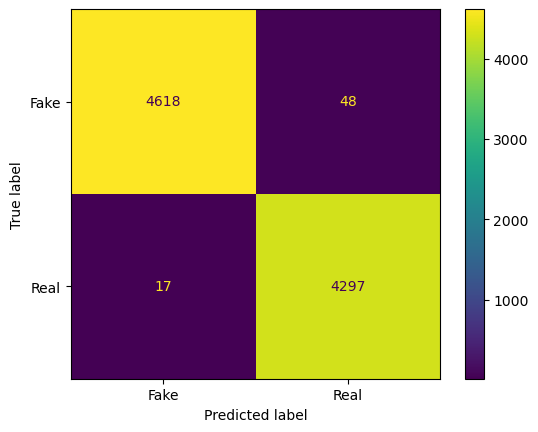

In [96]:
cm = confusion_matrix(y_test, prediction_rf)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Fake','Real'])
cmd.plot()

### Cross Validation Score(RandomForest Classifier)

In [72]:
score_rf = cross_val_score(model_rf, x, y, cv=5)
print('Score :', score_rf)
print('\033[1m'+'Cross Validation Score :', model_rf, ":"+'\033[0m\n')
print("Mean CV Score :", score_rf.mean())
print("Standard Deviation :",score_rf.std())
print('Difference in accuracy_score & CV Score:', (accuracy_score(y_test, prediction_rf)*100)-(score_rf.mean()*100))

Score : [0.99097996 0.99276169 0.99253898 0.99365185 0.99331774]
Cross Validation Score : Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', RandomForestClassifier())]) :

Mean CV Score : 0.9926500438662744
Standard Deviation : 0.0009234111889819643
Difference in accuracy_score & CV Score: 0.011164878405963918


## Algorithms Uses In This Model:

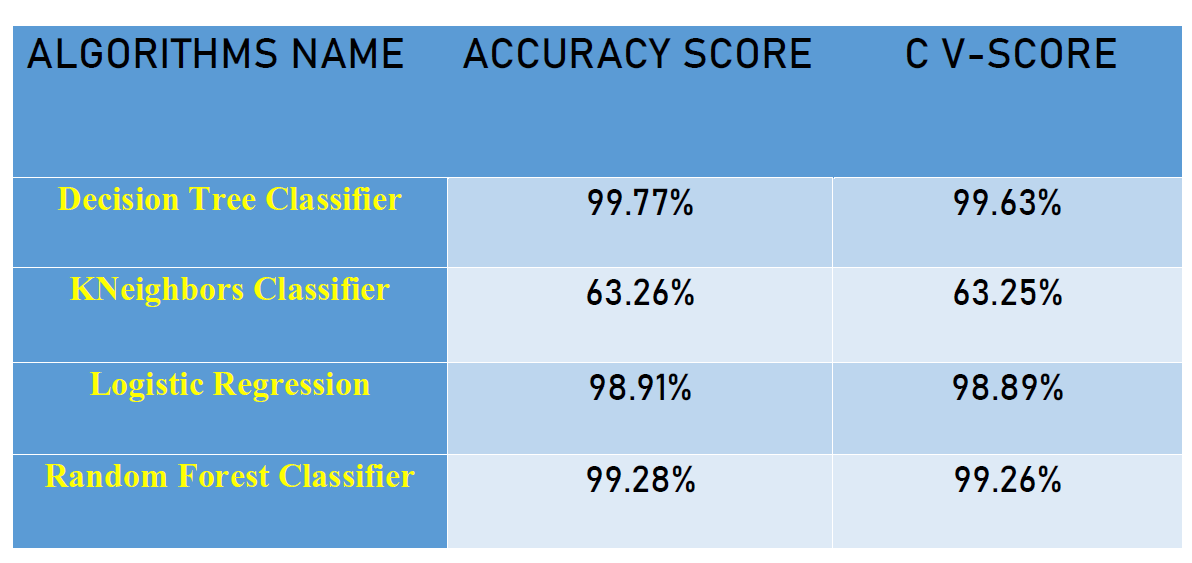

### We can see that Decision Tree classifer and Random Forest Classifier both are best accuracy score but Decision Tree Classifier is higher for one or two points. 

### Decision Tree Classifier gives maximum accuracy score of 99.77% and with cross validation score of 99.63%

### Decision Tree Classifier is a Final Model 

# Saving Final Model(DecisionTree Classifier)

In [125]:
import pickle
file_name = 'fake_real_news_prediction.pkl'
pickle.dump(model_dt, open(file_name, 'wb'))

## Predictions of Test Dataset Using Final Model

In [126]:
import numpy as np

dt_a=np.array(y_test)
predicted=np.array(model_dt.predict(x_test))
df_com = pd.DataFrame({'Original':dt_a, 'Predicted':predicted}, index=range(len(dt_a)))
df_com

,Original,Predicted
0,fake,fake
1,true,true
2,fake,fake
3,true,true
4,fake,fake
...,...,...
8975,fake,fake
8976,fake,fake
8977,fake,fake
8978,true,true


In [123]:
df_com.head(10)

,Original,Predicted
0,fake,fake
1,true,true
2,fake,fake
3,true,true
4,fake,fake
5,true,true
6,fake,fake
7,fake,fake
8,true,true
9,fake,fake


In [124]:
df_com.tail(10)

,Original,Predicted
8970,fake,fake
8971,true,true
8972,true,true
8973,fake,fake
8974,true,true
8975,fake,fake
8976,fake,fake
8977,fake,fake
8978,true,true
8979,fake,fake


### We Can Visualize original and Predicted Value are 99.80% Correct Value
